
1. Describe the data. What does it represent? What types are present? What does each data points' distribution look like? Discuss these questions, and your own, with your partners. Document your conclusions.
2. What kind of cleaning is needed? Document any potential issues that will need to be resolved.


List of files:
1) mapdata_copyright_openstreetmap_contributors.rds


2) mapdata_copyright_openstreetmap_contributors.txt


3) noaa_weather_qclcd_documentation.pdf


4) sampleSubmission.csv


5) spray.csv


6) test.csv


7) train.csv


8) weather.csv

In [16]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [3]:
train = pd.read_csv('../datasets/train.csv')
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [4]:
weather = pd.read_csv('../datasets/weather.csv')
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [5]:
spray = pd.read_csv('../datasets/spray.csv')
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


## Basic EDA for train dataset

In [6]:
#create a simple function to run EDA on our dataset
def eda(dataframe):
    """Runs basic EDA on dataframe."""
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("dataframe index \n", dataframe.index, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe describe \n", dataframe.describe(include='all'), '\n')

In [7]:
eda(train)

missing values 
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

dataframe index 
 RangeIndex(start=0, stop=10506, step=1) 

dataframe types 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

dataframe shape 
 (10506, 12) 

dataframe describe 
               Date                                            Address  \
coun

In [85]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [11]:
#from the EDA, we need to convert date to datetime format
train["Date"] = pd.to_datetime(train["Date"])

In [12]:
train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [66]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [13]:
# we also need to convert some of the variables into categorical data
train['Address'] = train['Address'].astype('category')
train['Species'] = train['Species'].astype('category')
train['Street'] = train['Street'].astype('category')
train['Trap'] = train['Trap'].astype('category')
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

In [65]:
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


## Train EDA & Graph
- now we make a graph based on the species, total number of observations, and observations with wnv

In [75]:
plt.rcParams['figure.figsize'] = [12, 8]
bar_species1 = pd.DataFrame(train['Species'].value_counts()).reset_index()
bar_species1 = pd.merge(bar_species1, pd.DataFrame(train[train['WnvPresent']==1]['Species'].value_counts()).reset_index(), how='left', on='index')

In [76]:
bar_species1.columns = ['species', 'num_observations', 'observations_with_wnv']


In [77]:
bar_species1

,species,num_observations,observations_with_wnv
0,PIPIENS/RESTUANS,4752,262.0
1,RESTUANS,2740,49.0
2,PIPIENS,2699,240.0
3,TERRITANS,222,NaN
4,SALINARIUS,86,NaN
5,TARSALIS,6,NaN
6,ERRATICUS,1,NaN


### Total Number of Observations and WNV Occurence

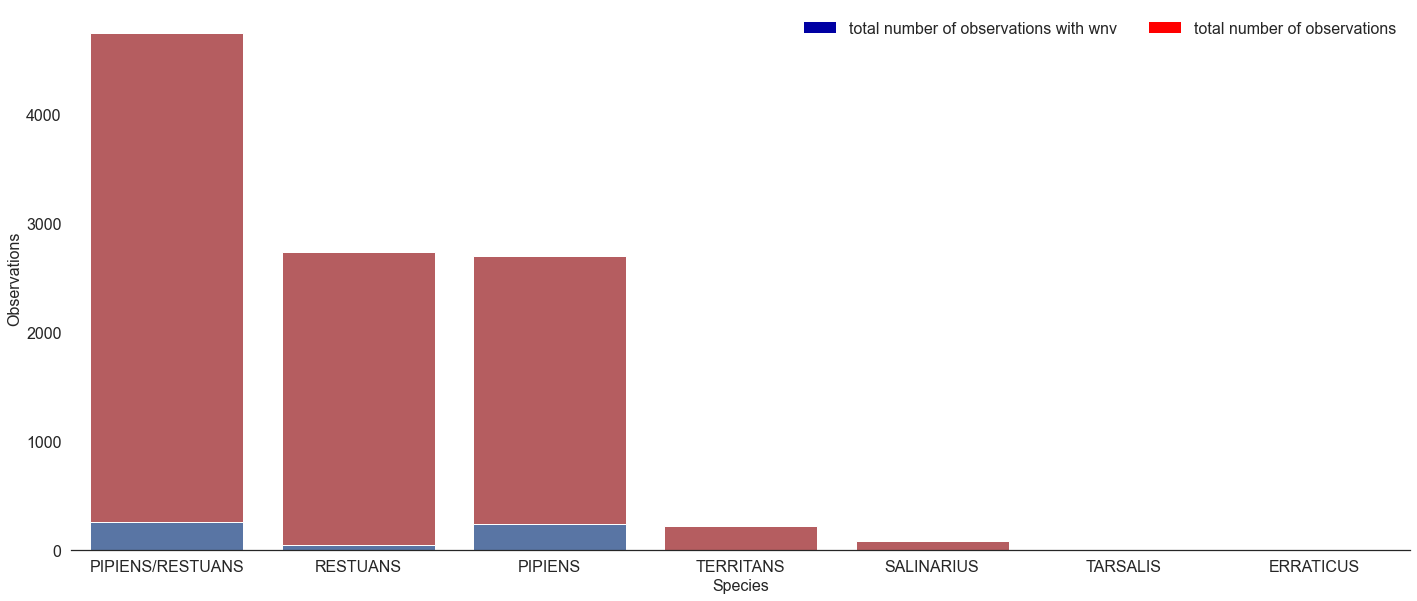

In [78]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x="species", y="num_observations", data=bar_species1, color = 'r')

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x="species", y="observations_with_wnv", data=bar_species1, color = 'b')



topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['total number of observations with wnv', 'total number of observations'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Observations")
bottom_plot.set_xlabel("Species")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

**Graph Explanation**
- The lines in red are the total number of observations
- The lines in blue are the total number of observations with wnv 

In [69]:
#we put the name CULEX back into the species column
train['Species'] = train['Species'].str.replace('CULEX ', '')


In [ ]:
stop here, here onwards is weather eda

## Basic EDA on Weather Dataset

In [80]:
eda(weather)

missing values 
 Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64 

dataframe index 
 RangeIndex(start=0, stop=2944, step=1) 

dataframe types 
 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: obje

In [82]:
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4


In [84]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')


## Feature Creation
- we have to create some features due to the requirements stated on kaggle


### Feature: NumMosquitos
- since mosquito count maxes at 50 and we have to create a new entry after that


In [88]:
train[train.NumMosquitos == 50]
train.groupby(['Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum().sort_values('NumMosquitos', ascending=False).head()

,Date,Trap,Species,NumMosquitos
16759,2007-08-16,T115,PIPIENS,2532.0
8191,2007-07-25,T115,PIPIENS,2356.0
21519,2007-08-28,T115,PIPIENS,2207.0
13931,2007-08-08,T138,PIPIENS,1658.0
23423,2007-09-05,T115,PIPIENS,1648.0


In [89]:
train = pd.merge(train, train.groupby(['Date', 'Trap', 'Species'], as_index=False)['NumMosquitos'].sum(), how='left', on=['Date', 'Trap', 'Species'])

train.columns = ['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Tot_Mos_Species_Day']

In [90]:
train['Year'] = train['Date'].dt.year
#only take into account the year from date

In [91]:
train


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Tot_Mos_Species_Day,Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1.0,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,1.0,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,1.0,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,1.0,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,4.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1,6.0,2013
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0,5.0,2013
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0,1.0,2013
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0,5.0,2013
